In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
image = cv2.imread('HappyFish.jpg')  # Replace with your image path

In [3]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:
edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)

In [5]:
# Detect lines using the probabilistic Hough transform
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=50, maxLineGap=10)

# Draw the lines on the original image
output_image = image.copy()

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)


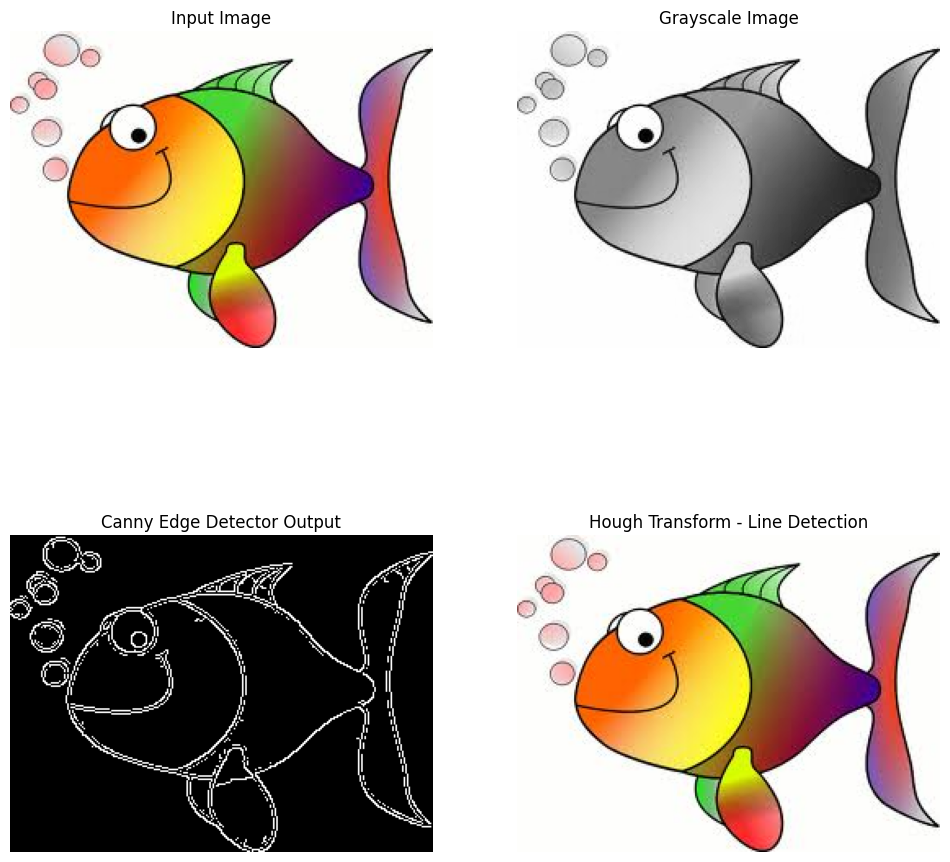

In [6]:
# Displaying results using Matplotlib
plt.figure(figsize=(12, 12))

# Input Image and Grayscale Image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Canny Edge Detection Output
plt.subplot(2, 2, 3)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detector Output')
plt.axis('off')

# Hough Transform Result
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Hough Transform - Line Detection')
plt.axis('off')

# Display all results
plt.show()


Explanation of Code:

Step 1: Import the necessary libraries: cv2 for OpenCV operations, numpy for mathematical operations, and matplotlib to display the images.

Step 2: Load the image with cv2.imread().

Step 3: Convert the color image to grayscale using cv2.cvtColor().

Step 4: Detect the edges using cv2.Canny(). The function parameters include: 
        50: Lower threshold for edge detection.
        150: Upper threshold for edge detection.
        apertureSize=3: Kernel size for Sobel operator used in edge detection.

Step 5: Use HoughLinesP() for the probabilistic Hough Line Transform. It returns line segments, and for each line segment, it provides the coordinates of the endpoints (x1, y1, x2, y2). The detected lines are drawn on a copy of the original image.